In [582]:
%reset
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")
import torch
import numpy as np
import defmod as dm
import multimodule_usefulfunctions as mm 
import matplotlib.pyplot as plt
import defmod.hamiltonian_multishape as hamiltonian
import model_MultiShapeCirclesTranslation as model

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [583]:
nb_pts1 = 10
nb_pts2 = 7
dim = 2

o1 = torch.tensor([0,0]).float()
o2 = torch.tensor([10,0]).float()
origin = [o1,o2]
r1 = 2
r2 = 1
radius = [r1, r2]
nb_pts = [nb_pts1, nb_pts2]
source = mm.multipleCircles(origin, radius, nb_pts)

origin_target = [[0,5], [10,-5]]
target = mm.multipleCircles(origin_target, radius, nb_pts)

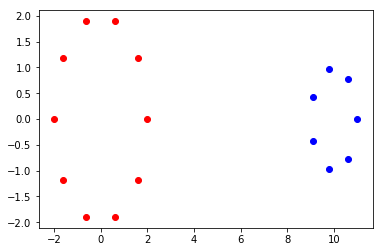

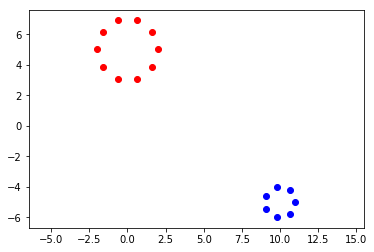

In [584]:
plt.figure()
plt.scatter(source[0][:, 0].detach().numpy(), source[0][:, 1].detach().numpy(), c='red')
plt.scatter(source[1][:, 0].detach().numpy(), source[1][:, 1].detach().numpy(), c='blue')

plt.figure()
plt.scatter(target[0][:, 0].detach().numpy(), target[0][:, 1].detach().numpy(), c='red')
plt.scatter(target[1][:, 0].detach().numpy(), target[1][:, 1].detach().numpy(), c='blue')

plt.axis('equal')
plt.show()

In [585]:
# Defining the deformation modules
sigma1 = 3
manifold1 = dm.manifold.Landmarks(dim, nb_pts1, gd=source[0].view(-1))
trans1 = dm.deformationmodules.Translations(manifold1, sigma1)

sigma2 = 3
manifold2 = dm.manifold.Landmarks(dim, nb_pts2, gd=source[1].view(-1))
trans2 = dm.deformationmodules.Translations(manifold2, sigma2)

module_list = [trans1, trans2]
sigma_bg = 0.1
modules = dm.multishape.MultiShapeModule(module_list, sigma_bg)

In [586]:
# defining cotangent variable
# needed to prevent that everything is symmetric (gradient would be zero and nothing moves)
#modules.manifold.fill_cotan( [*[torch.rand(gd.shape) for gd in modules.manifold.gd[:-1]], [torch.rand(gd.shape) for gd in modules.manifold.gd[-1]]])

In [587]:
constr_Id = dm.constraints.Identity()
H = hamiltonian.Hamiltonian_multi(modules, constr_Id)

In [588]:
gd0_list = [*source, source]
mom0_list = [*[torch.ones(gd.shape) for gd in modules.manifold.gd[:-1]], [torch.ones(gd.shape) for gd in modules.manifold.gd[-1]]]

In [589]:
H.module.manifold.fill_gd([gd0_list[0].view(-1), gd0_list[1].view(-1), [gd0_list[2][0].view(-1), gd0_list[2][1].view(-1)]])
H.module.manifold.fill_cotan([mom0_list[0].view(-1), mom0_list[1].view(-1), [mom0_list[2][0].view(-1), mom0_list[2][1].view(-1)]])
H.geodesic_controls()
#H.constraints(H.module)
H.module.controls

[tensor([0.2587, 0.2589, 0.2586, 0.2584, 0.2587, 0.2589, 0.2585, 0.2584, 0.2588,
         0.2589, 0.2585, 0.2584, 0.2588, 0.2589, 0.2585, 0.2584, 0.2587, 0.2589,
         0.2586, 0.2585], grad_fn=<ViewBackward>),
 tensor([0.2747, 0.2747, 0.2744, 0.2745, 0.2748, 0.2747, 0.2744, 0.2746, 0.2748,
         0.2746, 0.2745, 0.2747, 0.2746, 0.2745], grad_fn=<ViewBackward>),
 [tensor([1.7413, 1.7413, 1.7413, 1.7413, 1.7413, 1.7413, 1.7413, 1.7413, 1.7413,
          1.7413, 1.7413, 1.7413, 1.7413, 1.7413, 1.7413, 1.7413, 1.7413, 1.7413,
          1.7413, 1.7413], grad_fn=<SliceBackward>),
  tensor([1.7254, 1.7254, 1.7254, 1.7254, 1.7254, 1.7254, 1.7254, 1.7254, 1.7254,
          1.7254, 1.7254, 1.7254, 1.7254, 1.7254], grad_fn=<SliceBackward>)]]

In [590]:
H.constraints(H.module)

tensor([[ 2.3842e-07,  2.3842e-07],
        [ 1.1921e-07, -2.3842e-07],
        [ 3.5763e-07,  2.3842e-07],
        [ 4.7684e-07,  1.1921e-07],
        [ 0.0000e+00,  0.0000e+00],
        [ 5.9605e-07,  8.3447e-07],
        [ 7.1526e-07,  4.7684e-07],
        [-2.3842e-07, -2.3842e-07],
        [ 4.7684e-07,  4.7684e-07],
        [ 3.5763e-07,  3.5763e-07],
        [-1.1921e-07,  4.7684e-07],
        [ 1.1921e-07,  2.3842e-07],
        [ 7.1526e-07,  3.5763e-07],
        [ 0.0000e+00,  4.7684e-07],
        [ 1.1921e-07,  3.5763e-07],
        [ 2.3842e-07,  2.3842e-07],
        [ 5.9605e-07,  7.1526e-07]], grad_fn=<CatBackward>)

In [591]:
from defmod import shooting
shooting.shoot_euler(H, it=10)

([<defmod.manifold.CompoundManifold at 0x7f6ce54b9390>,
 [[tensor([0.2587, 0.2589, 0.2586, 0.2584, 0.2587, 0.2589, 0.2585, 0.2584, 0.2588,
           0.2589, 0.2585, 0.2584, 0.2588, 0.2589, 0.2585, 0.2584, 0.2587, 0.2589,
           0.2586, 0.2585], grad_fn=<ViewBackward>),
   tensor([0.2747, 0.2747, 0.2744, 0.2745, 0.2748, 0.2747, 0.2744, 0.2746, 0.2748,
           0.2746, 0.2745, 0.2747, 0.2746, 0.2745], grad_fn=<ViewBackward>),
   [tensor([1.7413, 1.7413, 1.7413, 1.7413, 1.7413, 1.7413, 1.7413, 1.7413, 1.7413,
            1.7413, 1.7413, 1.7413, 1.7413, 1.7413, 1.7413, 1.7413, 1.7413, 1.7413,
            1.7413, 1.7413], grad_fn=<SliceBackward>),
    tensor([1.7254, 1.7254, 1.7254, 1.7254, 1.7254, 1.7254, 1.7254, 1.7254, 1.7254,
            1.7254, 1.7254, 1.7254, 1.7254, 1.7254], grad_fn=<SliceBackward>)]],
  [tensor([0.2654, 0.2584, 0.2634, 0.2626, 0.2611, 0.2645, 0.2563, 0.2649, 0.2539,
           0.2622, 0.2519, 0.2588, 0.2539, 0.2547, 0.2563, 0.2528, 0.2610, 0.2523,
           

In [574]:
# set parameters
reg_param = 10**-2 # regularisation parameter

gd0_tensor = torch.cat([gd0_list[0], gd0_list[1], gd0_list[2][0], gd0_list[2][1]],0).requires_grad_().view(-1)
mom0_tensor = torch.cat([mom0_list[0], mom0_list[1], mom0_list[2][0], mom0_list[2][1]],0).requires_grad_().view(-1)
    
gd0_tensor.retain_grad()
mom0_tensor.retain_grad()
    
EnergyFunctional = model.EnergyFunctional(modules, H, constr_Id, target, dim, reg_param)

# do registration
X = [gd0_tensor, mom0_tensor]
X = model.gradientdescent(EnergyFunctional, X)

constr_________________
tensor([[ 1.2207e-04, -1.8311e-04],
        [-6.1035e-05,  6.1035e-05],
        [-4.8828e-04, -4.2725e-04],
        [-1.2207e-04, -3.6621e-04],
        [ 1.2207e-04, -4.8828e-04],
        [-3.6621e-04,  0.0000e+00],
        [ 2.4414e-04, -3.0518e-04],
        [ 2.4414e-04,  1.2207e-04],
        [-2.4414e-04, -6.1035e-05],
        [-1.2207e-04,  6.1035e-05],
        [ 4.8828e-04,  3.0518e-04],
        [ 0.0000e+00,  1.2207e-04],
        [ 0.0000e+00, -1.8311e-04],
        [ 3.6621e-04, -3.0518e-04],
        [ 0.0000e+00,  2.4414e-04],
        [ 6.1035e-05, -2.4414e-04],
        [ 0.0000e+00, -5.4932e-04]], grad_fn=<CatBackward>)
constr_after_shotting____________
tensor([[ 0.0000e+00,  3.0518e-05],
        [ 2.4414e-04,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -6.1035e-05],
        [ 0.0000e+00,  2.4414e-04],
        [ 4.8828e-04,  0.0000e+00],
        [ 6.1035e-05,  2.4414e-04],
        [ 0.0000e+00,  7.8125e-03],
        [-3.9062e-

In [512]:
constr_Id(EnergyFunctional.h.module)

tensor([[ 2.6143e-04, -4.4354e-04],
        [ 1.4259e-04, -2.5588e-04],
        [-2.7996e-04,  1.4861e-04],
        [-7.0694e-04,  4.5610e-04],
        [-8.1006e-04,  4.7928e-04],
        [-7.0875e-04,  4.0428e-04],
        [-4.9607e-04,  2.9734e-04],
        [-1.2829e-04,  3.1535e-05],
        [ 2.2084e-04, -3.1834e-04],
        [ 2.9880e-04, -4.7380e-04],
        [ 3.8199e-10,  1.3411e-07],
        [ 2.6557e-10,  1.1921e-07],
        [-1.2733e-11,  1.2666e-07],
        [-3.0195e-10,  9.6858e-08],
        [-2.9468e-10,  1.0431e-07],
        [-5.2751e-11,  7.4506e-08],
        [ 2.8012e-10,  1.4156e-07]], grad_fn=<CatBackward>)

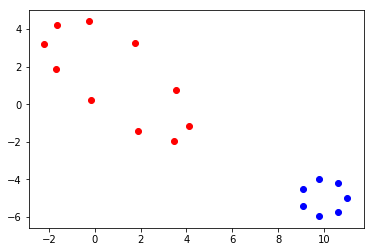

In [314]:
gd_moved = EnergyFunctional.h.module.manifold.gd

plt.figure()
plt.scatter(gd_moved[0].view(-1,2)[:, 0].detach().numpy(), gd_moved[0].view(-1,2)[:, 1].detach().numpy(), c='red')
plt.scatter(gd_moved[1].view(-1,2)[:, 0].detach().numpy(), gd_moved[1].view(-1,2)[:, 1].detach().numpy(), c='blue')

plt.show()

In [316]:
man_final = EnergyFunctional.h.module.manifold


l, h = EnergyFunctional.h.module.compute_geodesic_variables(constr_Id)
constr_final = constr_Id(EnergyFunctional.h.module)
print(constr_final)
print(torch.dot(l.view(-1), constr_final.view(-1)))

control1__________________________
[tensor([ 0.5623, -1.5241,  0.6411, -0.3156,  0.9132,  0.8890,  0.6136,  1.9989,
        -0.0289,  2.0999, -0.1821,  1.9120, -0.0279,  1.7791,  0.8426,  1.3698,
         1.4109,  0.6222,  0.4676, -1.0924], grad_fn=<ViewBackward>), tensor([ 0.3319, -2.8747,  0.1995, -2.6125, -0.0705, -2.5663, -0.2933, -2.7237,
        -0.3036, -3.0164, -0.0758, -3.2025,  0.2118, -3.1305],
       grad_fn=<ViewBackward>), [tensor([ 2.2606, -1.6138,  1.5512, -0.6969,  0.5048,  0.8931, -0.0598,  1.7521,
        -0.1568,  1.8766, -0.1564,  1.8873, -0.2828,  1.9783, -0.3330,  1.7752,
         0.2900,  0.7375,  1.5947, -0.8506], grad_fn=<AddBackward0>), tensor([-0.0762, -2.8751, -0.0477, -2.9349,  0.0170, -2.9498,  0.0688, -2.9082,
         0.0686, -2.8420,  0.0169, -2.8010, -0.0474, -2.8156],
       grad_fn=<AddBackward0>)]]
[tensor([ 4.1145, -1.1760,  3.5397,  0.7444,  1.7414,  3.2295, -0.2414,  4.4495,
        -1.6523,  4.2241, -2.1952,  3.2176, -1.7052,  1.8885, -0.1609, 

In [317]:
EnergyFunctional.h.apply_constr()

Hamiltonian Apply Constraints___________________________
tensor(5.1813e-07, grad_fn=<DotBackward>)


tensor(5.1813e-07, grad_fn=<DotBackward>)

In [318]:
man_final.gd, man_final.cotan

([tensor([ 4.1145, -1.1760,  3.5397,  0.7444,  1.7414,  3.2295, -0.2414,  4.4495,
          -1.6523,  4.2241, -2.1952,  3.2176, -1.7052,  1.8885, -0.1609,  0.2420,
           1.8954, -1.4452,  3.4670, -1.9686], grad_fn=<AddBackward0>),
  tensor([11.0080, -4.9617, 10.6285, -4.1738,  9.7757, -3.9791,  9.0918, -4.5244,
           9.0918, -5.3989,  9.7757, -5.9441, 10.6285, -5.7495],
         grad_fn=<AddBackward0>),
  [tensor([4.1145, 2.1145, 3.7326, 3.2901, 2.7326, 4.0166, 1.4965, 4.0166, 0.4965,
           3.2901, 0.1145, 2.1145, 0.4965, 0.9390, 1.4965, 0.2124, 2.7326, 0.2124,
           3.7326, 0.9390], grad_fn=<AddBackward0>),
   tensor([ 9.8240, -1.1760,  9.4475, -0.3942,  8.6014, -0.2011,  7.9230, -0.7421,
            7.9230, -1.6099,  8.6014, -2.1510,  9.4475, -1.9579],
          grad_fn=<AddBackward0>)]],
 [tensor([ 0.5623, -1.5241,  0.6411, -0.3156,  0.9132,  0.8890,  0.6136,  1.9989,
          -0.0289,  2.1000, -0.1821,  1.9119, -0.0279,  1.7791,  0.8426,  1.3698,
           1.4

In [325]:
mod2 = modules.copy()
mod2.manifold.fill_gd(man_final.gd)
mod2.manifold.fill_cotan(man_final.cotan)
mod2.fill_controls(mod_final.controls)
l2, h2 = mod2.compute_geodesic_variables(constr_Id)

mod_final = EnergyFunctional.h.module
l_f, h_f = mod_final.compute_geodesic_variables(constr_Id)

constr_Id(mod2), constr_Id(mod_final)
mod2.manifold.gd, mod_final.manifold.gd, man_final.gd
mod2.manifold.cotan, mod_final.manifold.cotan

mod2.controls, mod_final.controls
l2-l_f

control1__________________________
[tensor([ 0.5623, -1.5241,  0.6411, -0.3156,  0.9132,  0.8890,  0.6136,  1.9989,
        -0.0289,  2.0999, -0.1821,  1.9120, -0.0279,  1.7791,  0.8426,  1.3698,
         1.4109,  0.6222,  0.4676, -1.0924], grad_fn=<ViewBackward>), tensor([ 0.3319, -2.8747,  0.1995, -2.6125, -0.0705, -2.5663, -0.2933, -2.7237,
        -0.3036, -3.0164, -0.0758, -3.2025,  0.2118, -3.1305],
       grad_fn=<ViewBackward>), [tensor([ 2.2606, -1.6138,  1.5512, -0.6969,  0.5048,  0.8931, -0.0598,  1.7521,
        -0.1568,  1.8766, -0.1564,  1.8873, -0.2828,  1.9783, -0.3330,  1.7752,
         0.2900,  0.7375,  1.5947, -0.8506], grad_fn=<AddBackward0>), tensor([-0.0762, -2.8751, -0.0477, -2.9349,  0.0170, -2.9498,  0.0688, -2.9082,
         0.0686, -2.8420,  0.0169, -2.8010, -0.0474, -2.8156],
       grad_fn=<AddBackward0>)]]
[tensor([ 4.1145, -1.1760,  3.5397,  0.7444,  1.7414,  3.2295, -0.2414,  4.4495,
        -1.6523,  4.2241, -2.1952,  3.2176, -1.7052,  1.8885, -0.1609, 

tensor([[-0.0458],
        [ 0.0473],
        [-0.0187],
        [-0.0093],
        [-0.0295],
        [ 0.0090],
        [-0.0122],
        [-0.0387],
        [ 0.0070],
        [-0.0682],
        [ 0.0132],
        [-0.0725],
        [ 0.0005],
        [-0.0477],
        [-0.0080],
        [-0.0205],
        [-0.0057],
        [-0.0349],
        [-0.0431],
        [ 0.0356],
        [-0.0111],
        [ 0.2949],
        [-0.0070],
        [ 0.2862],
        [ 0.0025],
        [ 0.2840],
        [ 0.0100],
        [ 0.2900],
        [ 0.0100],
        [ 0.2996],
        [ 0.0025],
        [ 0.3056],
        [-0.0069],
        [ 0.3034]], grad_fn=<SubBackward0>)

In [290]:
l_f, h_f = mod_final.compute_geodesic_variables(constr_Id)


control1__________________________
[tensor([ 0.5623, -1.5241,  0.6411, -0.3156,  0.9132,  0.8890,  0.6136,  1.9989,
        -0.0289,  2.0999, -0.1821,  1.9120, -0.0279,  1.7791,  0.8426,  1.3698,
         1.4109,  0.6222,  0.4676, -1.0924], grad_fn=<ViewBackward>), tensor([ 0.3319, -2.8747,  0.1995, -2.6125, -0.0705, -2.5663, -0.2933, -2.7237,
        -0.3036, -3.0164, -0.0758, -3.2025,  0.2118, -3.1305],
       grad_fn=<ViewBackward>), [tensor([ 2.2606, -1.6138,  1.5512, -0.6969,  0.5048,  0.8931, -0.0598,  1.7521,
        -0.1568,  1.8766, -0.1564,  1.8873, -0.2828,  1.9783, -0.3330,  1.7752,
         0.2900,  0.7375,  1.5947, -0.8506], grad_fn=<AddBackward0>), tensor([-0.0762, -2.8751, -0.0477, -2.9349,  0.0170, -2.9498,  0.0688, -2.9082,
         0.0686, -2.8420,  0.0169, -2.8010, -0.0474, -2.8156],
       grad_fn=<AddBackward0>)]]
[tensor([ 4.1145, -1.1760,  3.5397,  0.7444,  1.7414,  3.2295, -0.2414,  4.4495,
        -1.6523,  4.2241, -2.1952,  3.2176, -1.7052,  1.8885, -0.1609, 

In [291]:
l2, h2 = mod2.compute_geodesic_variables(constr_Id)
fields = mod2.field_generator()
gd_moved = [f(p) for f,p in zip(fields, dm.multimodule_usefulfunctions.gdlist_reshape(mod2.manifold.gd, [-1,mod2.__manifold.dim]))]

control1__________________________
[tensor([ 0.5623, -1.5241,  0.6411, -0.3156,  0.9132,  0.8890,  0.6136,  1.9989,
        -0.0289,  2.0999, -0.1821,  1.9120, -0.0279,  1.7791,  0.8426,  1.3698,
         1.4109,  0.6222,  0.4676, -1.0924], grad_fn=<ViewBackward>), tensor([ 0.3319, -2.8747,  0.1995, -2.6125, -0.0705, -2.5663, -0.2933, -2.7237,
        -0.3036, -3.0164, -0.0758, -3.2025,  0.2118, -3.1305],
       grad_fn=<ViewBackward>), [tensor([ 2.2606, -1.6138,  1.5512, -0.6969,  0.5048,  0.8931, -0.0598,  1.7521,
        -0.1568,  1.8766, -0.1564,  1.8873, -0.2828,  1.9783, -0.3330,  1.7752,
         0.2900,  0.7375,  1.5947, -0.8506], grad_fn=<AddBackward0>), tensor([-0.0762, -2.8751, -0.0477, -2.9349,  0.0170, -2.9498,  0.0688, -2.9082,
         0.0686, -2.8420,  0.0169, -2.8010, -0.0474, -2.8156],
       grad_fn=<AddBackward0>)]]
[tensor([ 4.1145, -1.1760,  3.5397,  0.7444,  1.7414,  3.2295, -0.2414,  4.4495,
        -1.6523,  4.2241, -2.1952,  3.2176, -1.7052,  1.8885, -0.1609, 

In [165]:
EnergyFunctional.gradE(gd0_tensor, mom0_tensor)

tensor([ 0.0000, -0.2753,  0.0000, -0.2753,  0.0000, -0.2753,  0.0000, -0.2753,
         0.0000, -0.2753,  0.0000, -0.2753,  0.0000, -0.2753,  0.0000, -0.2753,
         0.0000, -0.2753,  0.0000, -0.2753,  0.0000,  0.3261,  0.0000,  0.3261,
         0.0000,  0.3261,  0.0000,  0.3261,  0.0000,  0.3261,  0.0000,  0.3261,
         0.0000,  0.3261,  0.0000, -0.2753,  0.0000, -0.2753,  0.0000, -0.2753,
         0.0000, -0.2753,  0.0000, -0.2753,  0.0000, -0.2753,  0.0000, -0.2753,
         0.0000, -0.2753,  0.0000, -0.2753,  0.0000, -0.2753,  0.0000,  0.3261,
         0.0000,  0.3261,  0.0000,  0.3261,  0.0000,  0.3261,  0.0000,  0.3261,
         0.0000,  0.3261,  0.0000,  0.3261])

In [304]:
mod2.controls, mod_final.controls

([tensor([ 1.0206, -1.7865,  0.4548, -0.4373,  0.5080,  0.0477,  0.2737,  0.9422,
          -0.1705,  0.9553, -0.2098,  0.7055, -0.2880,  0.6645, -0.1073,  0.9549,
           0.2117,  1.3414,  0.3712, -0.8521], grad_fn=<ViewBackward>),
  tensor([ 0.2003, -1.0792,  0.1172, -0.9322, -0.0411, -0.8982, -0.1747, -0.9957,
          -0.1851, -1.1677, -0.0465, -1.2838,  0.1298, -1.2418],
         grad_fn=<ViewBackward>),
  [tensor([ 1.8023, -1.3515,  1.7374, -0.5752,  0.9100,  1.7344,  0.2801,  2.8089,
           -0.0151,  3.0212, -0.1288,  3.0938, -0.0227,  3.0929,  0.6168,  2.1902,
            1.4892,  0.0182,  1.6912, -1.0908], grad_fn=<SliceBackward>),
   tensor([ 0.0554, -4.6648,  0.0345, -4.6220, -0.0123, -4.6115, -0.0499, -4.6410,
           -0.0500, -4.6887, -0.0124, -4.7187,  0.0346, -4.7080],
          grad_fn=<SliceBackward>)]],
 [tensor([ 0.9748, -1.7392,  0.4361, -0.4466,  0.4785,  0.0567,  0.2615,  0.9033,
          -0.1636,  0.8873, -0.1966,  0.6329, -0.2874,  0.6169, -0.1154,  

In [300]:
fields = mod2.field_generator()
gd_moved2 = [f(p) for f,p in zip(fields, dm.multimodule_usefulfunctions.gdlist_reshape(mod2.manifold.gd, [-1,mod2.manifold.dim]))]

In [303]:
fields = mod_final.field_generator()
gd_moved_final = [f(p) for f,p in zip(fields, dm.multimodule_usefulfunctions.gdlist_reshape(mod_final.manifold.gd, [-1,mod_final.manifold.dim]))]

gd_moved2[0] - gd_moved_final[0]
mod2.manifold.gd[0]-mod_final.manifold.gd[0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       grad_fn=<SubBackward0>)

In [153]:
print(EnergyFunctional.modules.manifold.gd)
print(EnergyFunctional.target)

[tensor([ 2.0000e+00,  0.0000e+00,  1.6180e+00,  1.1756e+00,  6.1803e-01,
         1.9021e+00, -6.1803e-01,  1.9021e+00, -1.6180e+00,  1.1756e+00,
        -2.0000e+00,  2.4493e-16, -1.6180e+00, -1.1756e+00, -6.1803e-01,
        -1.9021e+00,  6.1803e-01, -1.9021e+00,  1.6180e+00, -1.1756e+00],
       grad_fn=<AddBackward0>), tensor([11.0000,  0.0000, 10.6235,  0.7818,  9.7775,  0.9749,  9.0990,  0.4339,
         9.0990, -0.4339,  9.7775, -0.9749, 10.6235, -0.7818],
       grad_fn=<AddBackward0>), [tensor([ 2.0000e+00,  0.0000e+00,  1.6180e+00,  1.1756e+00,  6.1803e-01,
         1.9021e+00, -6.1803e-01,  1.9021e+00, -1.6180e+00,  1.1756e+00,
        -2.0000e+00,  2.4493e-16, -1.6180e+00, -1.1756e+00, -6.1803e-01,
        -1.9021e+00,  6.1803e-01, -1.9021e+00,  1.6180e+00, -1.1756e+00],
       grad_fn=<AddBackward0>), tensor([11.0000,  0.0000, 10.6235,  0.7818,  9.7775,  0.9749,  9.0990,  0.4339,
         9.0990, -0.4339,  9.7775, -0.9749, 10.6235, -0.7818],
       grad_fn=<AddBackward0>)